# Setup
Import TensorFlow and other necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
import os
import shutil
from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

explore the datase

In [2]:
data_dir = Path('./Dataset/') # Create a Path object
image_count = len(list(data_dir.glob('*/*.bmp'))) 
print(image_count)

200


In [3]:
width, height = [], []
img_path = list(data_dir.glob('*/*.bmp'))
for file in img_path:
    img = Image.open(file)
    image_array = tf.keras.preprocessing.image.img_to_array(img)
    width.append(len(image_array[0]))
    height.append(len(image_array))

print(f'min height:{min(height)}')
print(f'min width:{min(width)}')


min height:553
min width:761


Uncomment if it run for the first time

In [4]:
#os.mkdir(f'{data_dir}/Cropped')
#os.mkdir(f'{data_dir}/Cropped/Train & Validation')
#os.mkdir(f'{data_dir}/Cropped/Train & Validation/Atypical Nevus')
#os.mkdir(f'{data_dir}/Cropped/Train & Validation/Common Nevus')
#os.mkdir(f'{data_dir}/Cropped/Train & Validation/Melanoma')

#os.mkdir(f'{data_dir}/Cropped/Test')
#os.mkdir(f'{data_dir}/Cropped/Test/Atypical Nevus')
#os.mkdir(f'{data_dir}/Cropped/Test/Common Nevus')
#os.mkdir(f'{data_dir}/Cropped/Test/Melanoma')

# Preprocessing
All images should have same size


In [5]:
crop_box = (0, 0, 761, 553)
image_name = "Img"
cropped_folders = ['Atypical Nevus', 'Common Nevus', 'Melanoma']
folder_counter = -1
counter = 0
sub_dir = {}
sub_dir['Atypical Nevus'] = Path(f'{data_dir}/Atypical Nevus')
sub_dir['Common Nevus'] = Path(f'{data_dir}/Common Nevus')
sub_dir['Melanoma'] = Path(f'{data_dir}/Melanoma')
for value in sub_dir.values():
    folder_counter += 1
    for file in list(value.glob('*.bmp')):
        img = Image.open(file)
        cropped_img = img.crop(crop_box)
        
        counter += 1
        cropped_img.save(f"{data_dir}/Cropped/Train & Validation/{cropped_folders[folder_counter]}/{image_name}{counter:03d}.bmp")


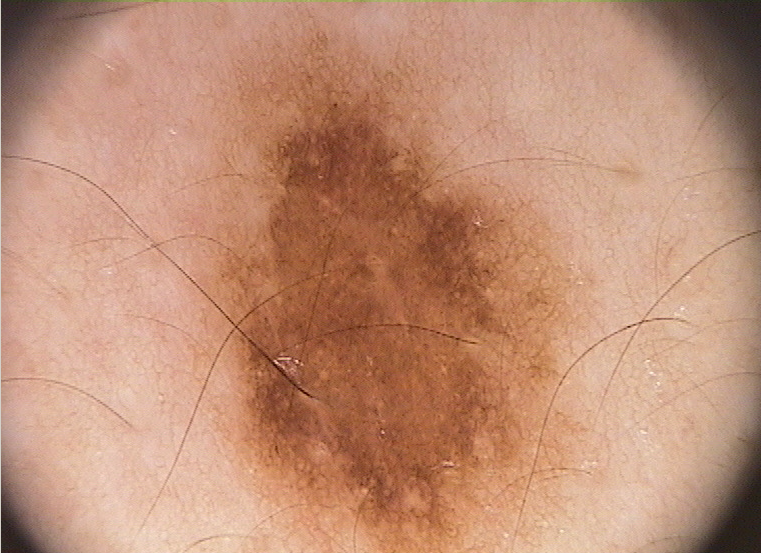

In [6]:
atypical_nevus = list(data_dir.glob('Cropped/Train & Validation/Atypical Nevus/*'))
Image.open(atypical_nevus[0])

Move 20 pics to test folders

In [7]:
source_dir = './Dataset/Cropped/Train & Validation/Atypical Nevus'
destination_dir = './Dataset/Cropped/Test/Atypical Nevus/'
file_list = os.listdir(source_dir)
counter = 0
for file_name in file_list:
    counter += 1
    if file_name.lower().endswith('.bmp'):
        source_file = os.path.join(source_dir, file_name)
        destination_file = os.path.join(destination_dir, file_name)
        shutil.move(source_file, destination_file)
        print(f"Moved {file_name} to {destination_dir}")
    if counter > 6:
        break



Moved Img014.bmp to ./Dataset/Cropped/Test/Atypical Nevus/
Moved Img028.bmp to ./Dataset/Cropped/Test/Atypical Nevus/
Moved Img029.bmp to ./Dataset/Cropped/Test/Atypical Nevus/
Moved Img015.bmp to ./Dataset/Cropped/Test/Atypical Nevus/
Moved Img001.bmp to ./Dataset/Cropped/Test/Atypical Nevus/
Moved Img017.bmp to ./Dataset/Cropped/Test/Atypical Nevus/
Moved Img003.bmp to ./Dataset/Cropped/Test/Atypical Nevus/


In [8]:
source_dir = './Dataset/Cropped/Train & Validation/Common Nevus'
destination_dir = './Dataset/Cropped/Test/Common Nevus/'
file_list = os.listdir(source_dir)
counter = 0
for file_name in file_list:
    counter += 1
    if file_name.lower().endswith('.bmp'):
        source_file = os.path.join(source_dir, file_name)
        destination_file = os.path.join(destination_dir, file_name)
        shutil.move(source_file, destination_file)
        print(f"Moved {file_name} to {destination_dir}")
    if counter > 6:
        break



Moved Img160.bmp to ./Dataset/Cropped/Test/Common Nevus/
Moved Img148.bmp to ./Dataset/Cropped/Test/Common Nevus/
Moved Img149.bmp to ./Dataset/Cropped/Test/Common Nevus/
Moved Img159.bmp to ./Dataset/Cropped/Test/Common Nevus/
Moved Img158.bmp to ./Dataset/Cropped/Test/Common Nevus/
Moved Img088.bmp to ./Dataset/Cropped/Test/Common Nevus/
Moved Img117.bmp to ./Dataset/Cropped/Test/Common Nevus/


In [9]:
source_dir = './Dataset/Cropped/Train & Validation/Melanoma'
destination_dir = './Dataset/Cropped/Test/Melanoma/'
file_list = os.listdir(source_dir)
counter = 0
for file_name in file_list:
    counter += 1
    if file_name.lower().endswith('.bmp'):
        source_file = os.path.join(source_dir, file_name)
        destination_file = os.path.join(destination_dir, file_name)
        shutil.move(source_file, destination_file)
        print(f"Moved {file_name} to {destination_dir}")
    if counter > 5:
        break



Moved Img174.bmp to ./Dataset/Cropped/Test/Melanoma/
Moved Img161.bmp to ./Dataset/Cropped/Test/Melanoma/
Moved Img175.bmp to ./Dataset/Cropped/Test/Melanoma/
Moved Img163.bmp to ./Dataset/Cropped/Test/Melanoma/
Moved Img177.bmp to ./Dataset/Cropped/Test/Melanoma/
Moved Img188.bmp to ./Dataset/Cropped/Test/Melanoma/


# Load data using a Keras utility

In [10]:
batch_size = 32
img_height = 553
img_width = 761

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory = f'./Dataset/Cropped/Train & Validation',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 180 files belonging to 3 classes.
Using 144 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory = './Dataset//Cropped/Train & Validation',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 180 files belonging to 3 classes.
Using 36 files for validation.


In [13]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = './Dataset//Cropped/Test',
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 20 files belonging to 3 classes.


In [14]:
class_names = train_ds.class_names
print(class_names)

['Atypical Nevus', 'Common Nevus', 'Melanoma']


# Visualize the data

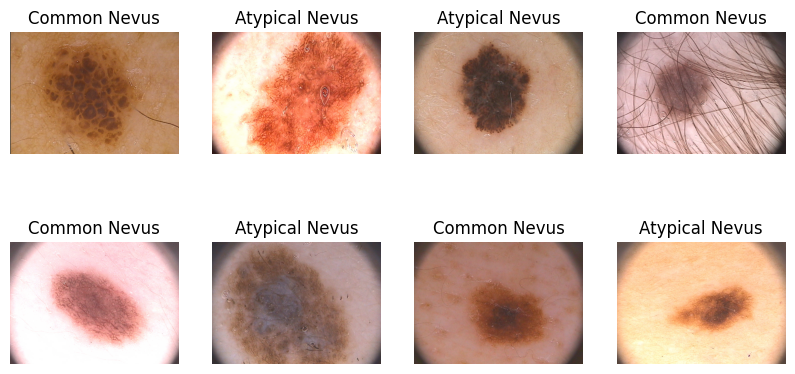

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 553, 761, 3)
(32,)


# Configure the dataset for performance
Make sure to use buffered prefetching, so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

* Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

* Dataset.prefetch() overlaps data preprocessing and model execution while training.


In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardize the data
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network; in general you should seek to make your input values small.

Here, you will standardize values to be in the [0, 1] range by using tf.keras.layers.Rescaling

In [18]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


Or, you can include the layer inside your model definition, which can simplify deployment. Use the second approach here.



# A basic Keras model

In [19]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(553, 761, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation = 'relu'),
  layers.Dense(num_classes)
])

# Compile the model
To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile()

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Model summary

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 553, 761, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 553, 761, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 276, 380, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 276, 380, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 138, 190, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 138, 190, 64)      1

# Train the model
is data shuffled through different epochs?


In Keras, when you use the fit() function to train a model with a dataset, the data is shuffled by default for each epoch unless you specify otherwise. This shuffling helps prevent the model from memorizing the order of the training examples and allows it to generalize better to unseen data.

The shuffling behavior can be controlled using the shuffle parameter of the fit() function. By default, shuffle=True, which means the data is shuffled for each epoch. If you want to disable shuffling, you can set shuffle=False


In [22]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
5/5 [==============================] - 9s 2s/step - loss: 26.0582 - accuracy: 0.3542 - val_loss: 4.6950 - val_accuracy: 0.2778
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 2.5486 - accuracy: 0.4167 - val_loss: 1.0797 - val_accuracy: 0.3611
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 1.0437 - accuracy: 0.4236 - val_loss: 1.0383 - val_accuracy: 0.2778
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 1.0027 - accuracy: 0.4792 - val_loss: 1.0043 - val_accuracy: 0.3889
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 0.9420 - accuracy: 0.5347 - val_loss: 0.9155 - val_accuracy: 0.4722
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 0.8321 - accuracy: 0.5972 - val_loss: 0.9350 - val_accuracy: 0.5278
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 0.7961 - accuracy: 0.6597 - val_loss: 0.9106 - val_accuracy: 0.5000
Epoch 8/10
5/5 [========================

# Visualize training results

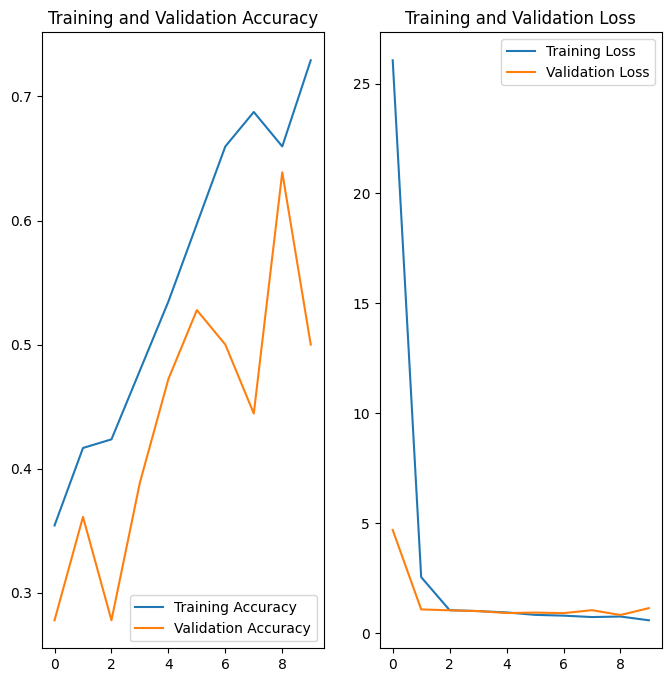

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predict on new data

In [24]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

1/1 [==============================] - 0s 283ms/step - loss: 0.8861 - accuracy: 0.5500
Test accuracy : 0.550000011920929


# techniques to reduce overfitting
* Data augmentation
* Dropout

# Data augmentation
Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(553, 761, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

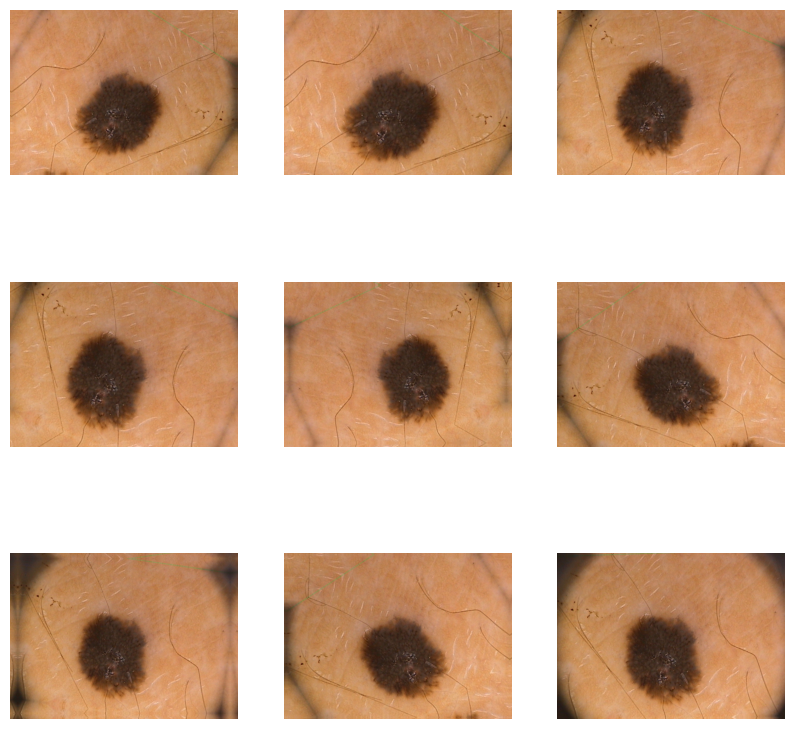

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Dropout
When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

In [27]:
model = Sequential([
  data_augmentation, # adding data agmentation
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), # adding dropout
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 553, 761, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 553, 761, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 553, 761, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 276, 380, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 276, 380, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 138, 190, 32)      0         
 g2D)                                                 

In [30]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 10s 2s/step - loss: 22.4460 - accuracy: 0.3542 - val_loss: 1.1360 - val_accuracy: 0.5278
Epoch 2/10
5/5 [==============================] - 9s 2s/step - loss: 1.8067 - accuracy: 0.3125 - val_loss: 1.1590 - val_accuracy: 0.5278
Epoch 3/10
5/5 [==============================] - 9s 2s/step - loss: 1.1489 - accuracy: 0.4167 - val_loss: 1.2648 - val_accuracy: 0.2778
Epoch 4/10
5/5 [==============================] - 9s 2s/step - loss: 1.0288 - accuracy: 0.4444 - val_loss: 0.9819 - val_accuracy: 0.5278
Epoch 5/10
5/5 [==============================] - 9s 2s/step - loss: 1.0355 - accuracy: 0.3819 - val_loss: 1.0227 - val_accuracy: 0.3333
Epoch 6/10
5/5 [==============================] - 9s 2s/step - loss: 1.0115 - accuracy: 0.4375 - val_loss: 1.0638 - val_accuracy: 0.2778
Epoch 7/10
5/5 [==============================] - 9s 2s/step - loss: 1.0070 - accuracy: 0.4375 - val_loss: 1.0146 - val_accuracy: 0.3611
Epoch 8/10
5/5 [=======================

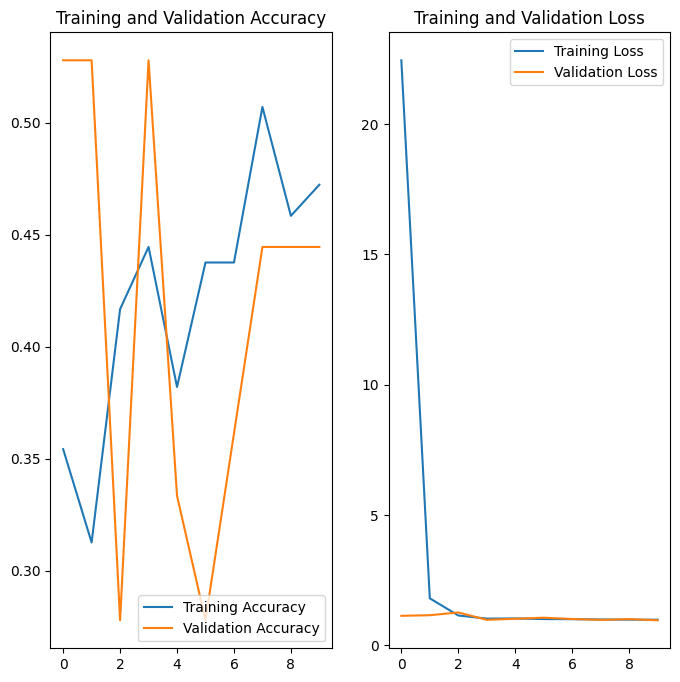

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

1/1 [==============================] - 0s 300ms/step - loss: 1.1206 - accuracy: 0.5500
Test accuracy : 0.550000011920929


The model accuracy decreased due to the application of overfitting techniques when they were unnecessary.

In [33]:
model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 553, 761, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 553, 761, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 276, 380, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 276, 380, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 138, 190, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 138, 190, 64)     

In [39]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 8s 2s/step - loss: 7.8492 - accuracy: 0.2847 - val_loss: 1.1039 - val_accuracy: 0.5278
Epoch 2/10
5/5 [==============================] - 9s 2s/step - loss: 1.1392 - accuracy: 0.4444 - val_loss: 1.1959 - val_accuracy: 0.2778
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.9967 - accuracy: 0.4444 - val_loss: 1.0825 - val_accuracy: 0.3611
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 0.9309 - accuracy: 0.5278 - val_loss: 1.0608 - val_accuracy: 0.3056
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 0.8816 - accuracy: 0.5069 - val_loss: 0.8837 - val_accuracy: 0.6111
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 0.8222 - accuracy: 0.6111 - val_loss: 0.9153 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 0.7265 - accuracy: 0.6458 - val_loss: 0.7584 - val_accuracy: 0.5833
Epoch 8/10
5/5 [=========================

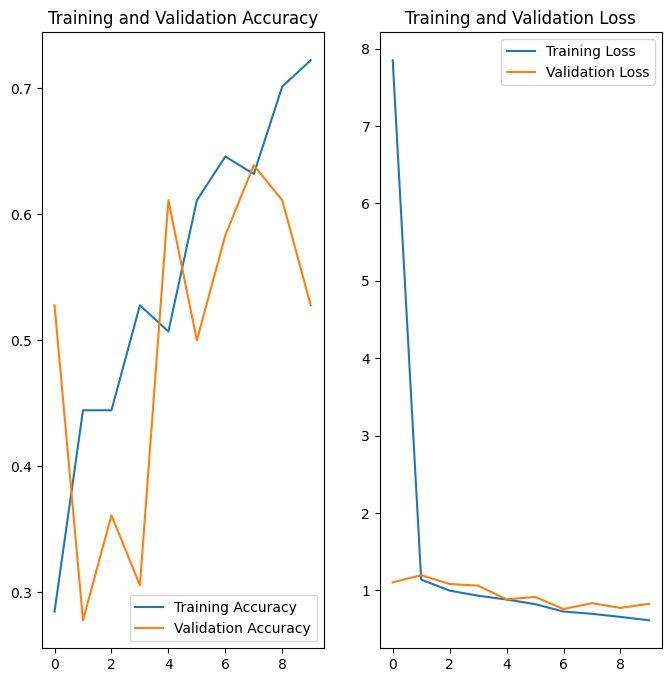

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)


1/1 [==============================] - 0s 274ms/step - loss: 0.9711 - accuracy: 0.6000
Test accuracy : 0.6000000238418579


In [42]:
train_batches = tf.data.experimental.cardinality(train_ds)
num_train_batches = train_ds.take(train_batches)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(num_train_batches))


Number of validation batches: 5


# Rescale pixel values
This model expects pixel values in [-1, 1], but at this point, the pixel values in your images are in [0, 1]. To rescale them, use the preprocessing method included with the model.

In [43]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


# Create the base model from the pre-trained convnets

In [44]:
IMG_SHAPE = (img_height, img_width) + (3,)
MobileNetV2_weights_path = './mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_160_no_top.h5'

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=MobileNetV2_weights_path)

This feature extractor converts each 553x761x3 image into a 18x24x1280 block of features. Let's see what it does to an example batch of images:

In [45]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(16, 18, 24, 1280)


# Feature extraction
In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.



# Freeze the convolutional base
It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's trainable flag to False will freeze all of them.

In [46]:
base_model.trainable = False

# Important note about BatchNormalization layers
Many models contain tf.keras.layers.BatchNormalization layers. This layer is a special case and precautions should be taken in the context of fine-tuning, as shown later in this tutorial.

When you set layer.trainable = False, the BatchNormalization layer will run in inference mode, and will not update its mean and variance statistics.

When you unfreeze a model that contains BatchNormalization layers in order to do fine-tuning, you should keep the BatchNormalization layers in inference mode by passing training = False when calling the base model. Otherwise, the updates applied to the non-trainable weights will destroy what the model has learned.

In [47]:
base_model.summary()


Model: "mobilenetv2_1.00_553"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 553, 761, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 277, 381, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 277, 381, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 277, 381, 32)         0         ['bn_Conv1[

# Add a classification head
To generate predictions from the block of features, average over the spatial 18x24 spatial locations, using a tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image.


In [48]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(16, 1280)


Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image.

In [49]:
prediction_layer = tf.keras.layers.Dense(num_classes, name="outputs")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(16, 3)


In [50]:
val_batches = tf.data.experimental.cardinality(train_ds)
val_dataset = train_ds.take(val_batches)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_dataset))


Number of validation batches: 5


Build a model by chaining together the data augmentation, rescaling, base_model and feature extractor layers using the Keras Functional API. As previously mentioned, use training=False as our model contains a BatchNormalization layer.

In [51]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training = False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [52]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 553, 761, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 553, 761, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 553, 761, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 553, 761, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_553 (Func  (None, 18, 24, 1280)      2257984   
 tional)                                                         
                                                             

The 8+ million parameters in MobileNet are frozen, but there are 3.8 thousand trainable parameters in the Dense layer.

In [53]:
len(model.trainable_variables)

2

In [54]:
#tf.keras.utils.plot_model(model, show_shapes=True)


In [55]:
learning_rate = 0.0001
model.compile(optimizer= tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]
              )

In [56]:
initial_epochs = 10

history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/10
5/5 [==============================] - 9s 2s/step - loss: 1.4447 - accuracy: 0.8403 - val_loss: 1.7464 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 7s 2s/step - loss: 1.3115 - accuracy: 0.8681 - val_loss: 1.5992 - val_accuracy: 0.9722
Epoch 3/10
5/5 [==============================] - 7s 1s/step - loss: 1.1953 - accuracy: 0.8333 - val_loss: 1.4709 - val_accuracy: 0.9722
Epoch 4/10
5/5 [==============================] - 7s 2s/step - loss: 1.2398 - accuracy: 0.7292 - val_loss: 1.3613 - val_accuracy: 0.9167
Epoch 5/10
5/5 [==============================] - 7s 2s/step - loss: 1.2111 - accuracy: 0.6667 - val_loss: 1.2754 - val_accuracy: 0.9167
Epoch 6/10
5/5 [==============================] - 7s 2s/step - loss: 1.2052 - accuracy: 0.5972 - val_loss: 1.2202 - val_accuracy: 0.8889
Epoch 7/10
5/5 [==============================] - 7s 2s/step - loss: 1.1425 - accuracy: 0.5278 - val_loss: 1.1771 - val_accuracy: 0.8611
Epoch 8/10
5/5 [=========================

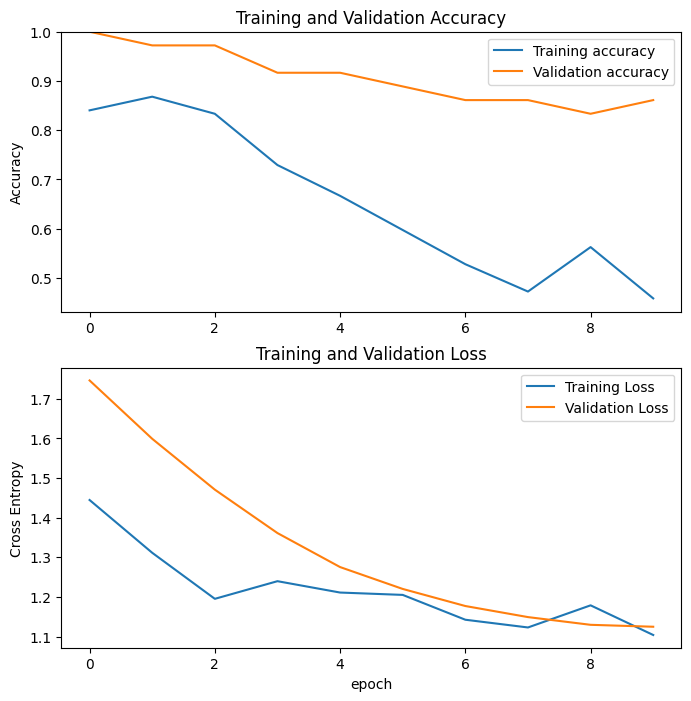

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim([min(plt.ylim()),1])

plt.subplot(2,1,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [58]:
_, accuracy = model.evaluate(test_ds)
print("accuracy: {:.2f}".format(accuracy))


1/1 [==============================] - 1s 729ms/step - loss: 1.0619 - accuracy: 0.8500
accuracy: 0.85


In [59]:
base_model.trainable = True

In [60]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))


Number of layers in the base model:  154


In [61]:
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [62]:
model.compile(optimizer= tf.keras.optimizers.legacy.RMSprop(learning_rate=learning_rate/10),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]
              )

In [63]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 553, 761, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 553, 761, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 553, 761, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 553, 761, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_553 (Func  (None, 18, 24, 1280)      2257984   
 tional)                                                         
                                                             

In [64]:
len(model.trainable_variables)

56

In [65]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs
history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

Epoch 10/20
5/5 [==============================] - 12s 2s/step - loss: 1.1949 - accuracy: 0.5208 - val_loss: 0.9530 - val_accuracy: 0.7778
Epoch 11/20
5/5 [==============================] - 11s 2s/step - loss: 0.9119 - accuracy: 0.4722 - val_loss: 0.9490 - val_accuracy: 0.8056
Epoch 12/20
5/5 [==============================] - 11s 2s/step - loss: 0.8831 - accuracy: 0.6042 - val_loss: 0.8162 - val_accuracy: 0.3056
Epoch 13/20
5/5 [==============================] - 11s 2s/step - loss: 0.8480 - accuracy: 0.4514 - val_loss: 0.8244 - val_accuracy: 0.3611
Epoch 14/20
5/5 [==============================] - 10s 2s/step - loss: 0.8200 - accuracy: 0.4375 - val_loss: 0.8328 - val_accuracy: 0.6667
Epoch 15/20
5/5 [==============================] - 10s 2s/step - loss: 0.7974 - accuracy: 0.4931 - val_loss: 0.7803 - val_accuracy: 0.3333
Epoch 16/20
5/5 [==============================] - 10s 2s/step - loss: 0.7626 - accuracy: 0.4931 - val_loss: 0.7546 - val_accuracy: 0.3889
Epoch 17/20
5/5 [==========

In [66]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

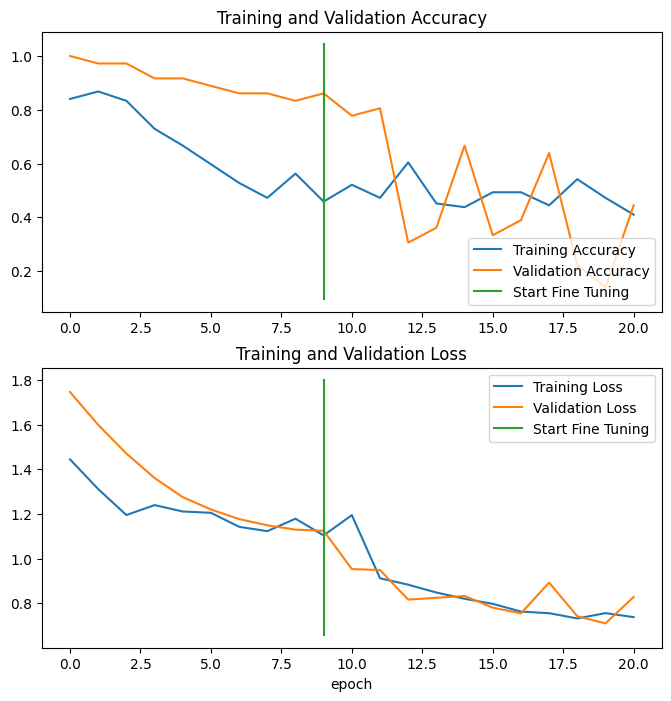

In [67]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
#plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
#plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [68]:
_, accuracy = model.evaluate(test_ds)
print("accuracy: {:.2f}".format(accuracy))

1/1 [==============================] - 1s 731ms/step - loss: 0.6387 - accuracy: 0.3000
accuracy: 0.30
